# Code to compare two tickers

In [17]:
import bydoux_tools as bt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [18]:
# S&P500 vs ZSP

tickers = 'USCC-U.TO','^SPX' # comme le S&P500 mais avec +3%
 

In [19]:
# Read the historical quotes for both tickers using the custom bydoux_tools function.
tbl1 = bt.read_quotes(tickers[0])
tbl2 = bt.read_quotes(tickers[1])

# Find the maximum of the first available dates (start of overlapping period)
mini = np.max([tbl1['mjd'][0], tbl2['mjd'][0]])

# Find the minimum of the last available dates (end of overlapping period)
maxi = np.min([tbl1['mjd'][-1], tbl2['mjd'][-1]])

# Create boolean masks for each table, keeping only rows within the overlapping date range
keep1 = (tbl1['mjd'] >= mini) & (tbl1['mjd'] <= maxi)
keep2 = (tbl2['mjd'] >= mini) & (tbl2['mjd'] <= maxi)

# Center the log_close values for each ticker by subtracting their mean
# This allows for easier visual comparison of trends
tbl1['log_close'] -= np.mean(tbl1['log_close'])
tbl2['log_close'] -= np.mean(tbl2['log_close'])

# Fit a linear trend (slope) to the log_close values over time (in years) for each ticker
# This gives the average annualized log-return trend for each asset
fit = np.polyfit(tbl1['mjd'] / 365.24, tbl1['log_close'], 1)
bt.printc(f'{tickers[0]}: {fit[0]*100:.2f} %/an')  # Print the slope for ticker 1
fit = np.polyfit(tbl2['mjd'] / 365.24, tbl2['log_close'], 1)
bt.printc(f'{tickers[1]}: {fit[0]*100:.2f} %/an')  # Print the slope for ticker 2

# Now, create boolean arrays to mark only the dates that are present in both tables (intersection)
keep1 = np.zeros_like(tbl1['mjd'], dtype=bool)
keep2 = np.zeros_like(tbl2['mjd'], dtype=bool)

# For each date in tbl1, if it exists in tbl2, mark as True in both masks
for i in range(len(tbl1)):
    if tbl1['mjd'][i] in tbl2['mjd']:
        keep1[i] = True  # Mark this date as present in both for tbl1
        # Find the index in tbl2 where the date matches and mark as True
        keep2[np.where(tbl2['mjd'] == tbl1['mjd'][i])[0][0]] = True

/Users/eartigau/miniconda/envs/p3.12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/eartigau/miniconda/envs/p3.12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


19:07:28.764 |  USCC-U.TO: 15.17 %/an
19:07:28.765 |  ^SPX: 6.77 %/an


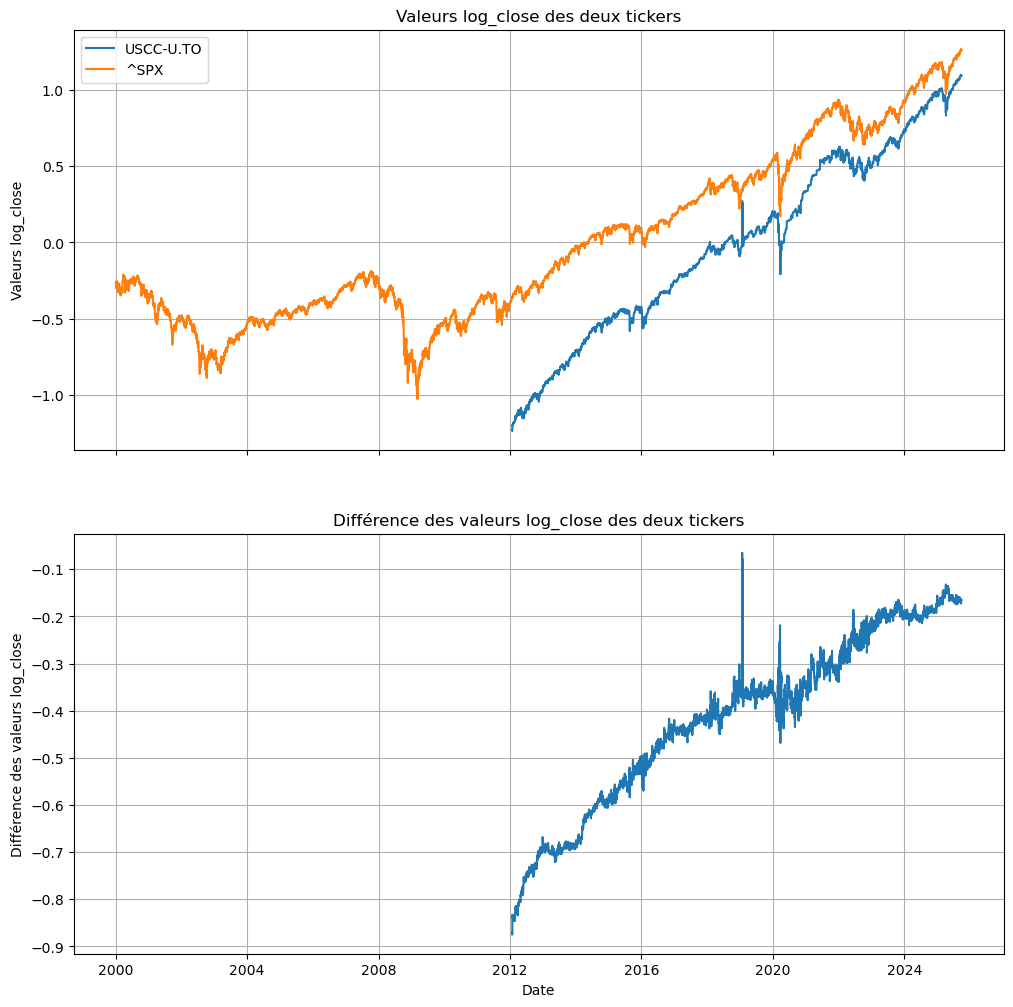

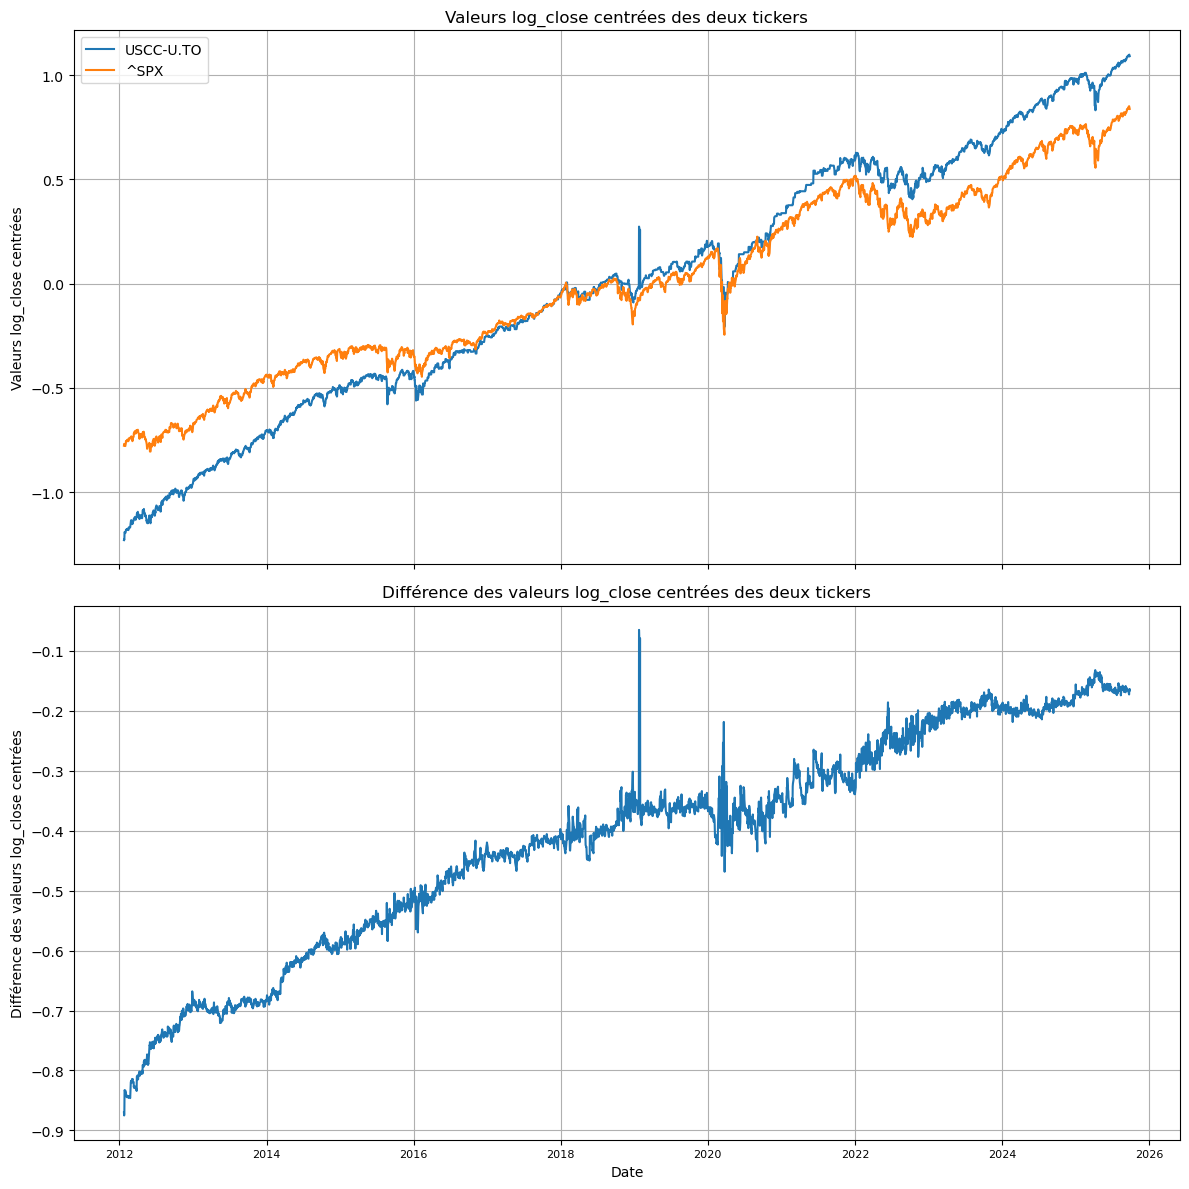

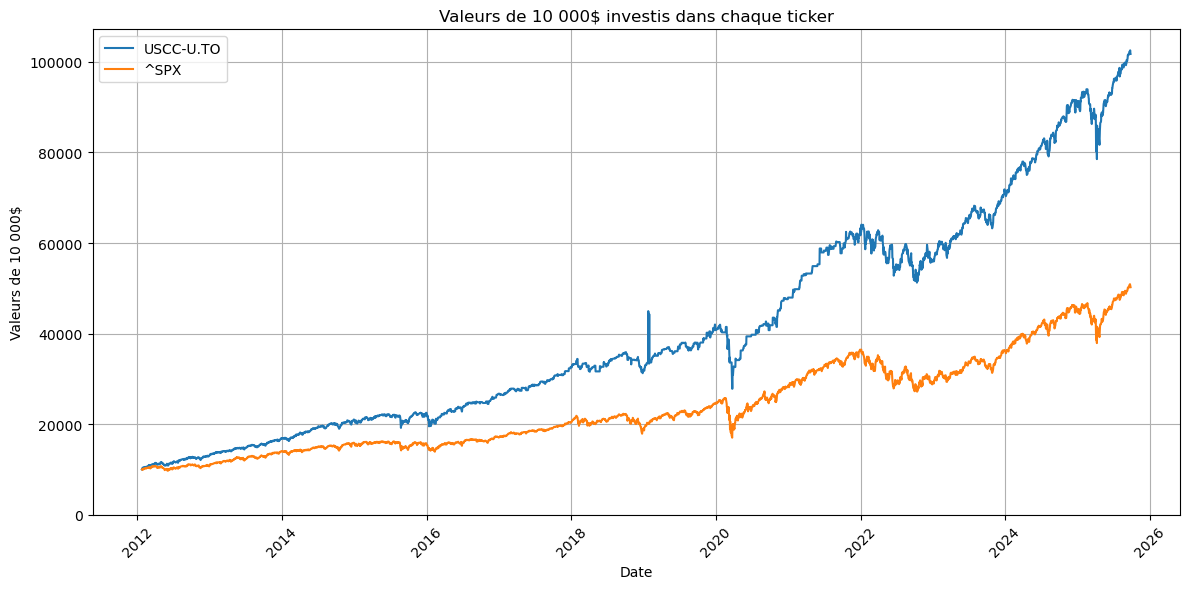

19:07:32.113 |  USCC-U.TO: Global X S&P 500 Covered Call ETF
19:07:32.116 |  ^SPX: S&P 500 INDEX
19:07:32.117 |  Evolution sur l'intervalle commun
19:07:32.120 |  USCC-U.TO: 15.17 %/an
19:07:32.121 |  RMS résidu: 7.36 %
19:07:32.123 |  ^SPX: 10.68 %/an
19:07:32.123 |  RMS résidu: 7.45 %
Erreur lors de l'accès aux top holdings : 'FundsData' object is not iterable
Erreur lors de l'accès aux top holdings : 'FundsData' object is not iterable


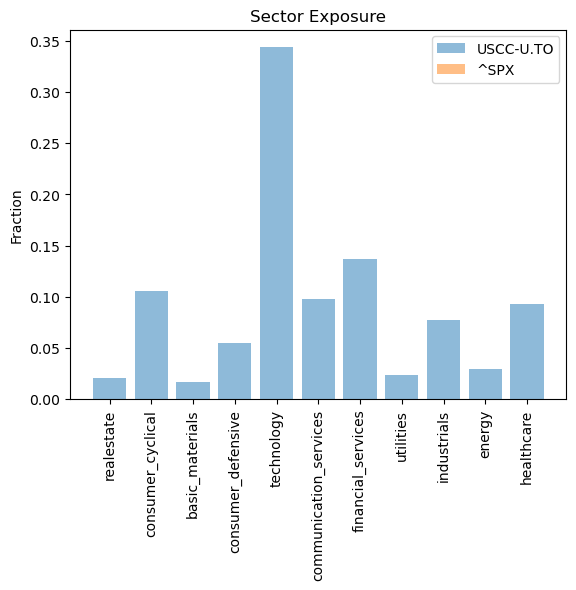

In [20]:
# Plot 1: Show both tickers' log_close values over time (full available range)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = [12,12])  # Create a figure with 2 subplots sharing the x-axis
# Plot the first ticker's log_close values (all dates)
ax[0].plot(tbl1['plot_date'], tbl1['log_close'], label=tickers[0])
# Plot the second ticker's log_close values (all dates)
ax[0].plot(tbl2['plot_date'], tbl2['log_close'], label=tickers[1])
# Plot the difference between the two tickers' log_close values (only on common dates)
ax[1].plot(tbl1['plot_date'][keep1], tbl1['log_close'][keep1] - tbl2['log_close'][keep2])
# Add a legend to the first subplot
ax[0].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_title('Valeurs log_close des deux tickers')
ax[1].set_title('Différence des valeurs log_close des deux tickers')
ax[0].set_ylabel('Valeurs log_close')
ax[1].set_ylabel('Différence des valeurs log_close')
ax[1].set_xlabel('Date')
# Display the plot
plt.show()

# Plot 2: Show both tickers' centered log_close values and their difference (only on common dates)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = [12,12], sharex=True)  # Create a new figure with 2 subplots
# Plot the first ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - np.mean(tbl1['log_close'][keep1]),
    label=tickers[0]
)
# Plot the second ticker's centered log_close values (mean subtracted, only common dates)
ax[0].plot(
    tbl2['plot_date'][keep2],
    tbl2['log_close'][keep2] - np.mean(tbl2['log_close'][keep2]),
    label=tickers[1]
)
# Plot the difference between the two tickers (only on common dates)
ax[1].plot(
    tbl1['plot_date'][keep1],
    tbl1['log_close'][keep1] - tbl2['log_close'][keep2]
)
# Add a legend to the first subplot
ax[0].legend()
# Change the font size of the x-axis tick labels for both subplots for better readability
for tick in ax[0].get_xticklabels():
    tick.set_fontsize(8)
for tick in ax[1].get_xticklabels():
    tick.set_fontsize(8)
# Display the plot

ax[0].grid()
ax[1].grid()
ax[0].set_title('Valeurs log_close centrées des deux tickers')
ax[1].set_title('Différence des valeurs log_close centrées des deux tickers')
ax[0].set_ylabel('Valeurs log_close centrées')
ax[1].set_ylabel('Différence des valeurs log_close centrées')
ax[1].set_xlabel('Date')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))  # Create a new figure for the next plot
ax.plot(
    tbl1['plot_date'][keep1],
    1e4*np.exp(tbl1['log_close'][keep1] - (tbl1['log_close'][keep1][0])),
    label=tickers[0]
)
ax.plot(
    tbl2['plot_date'][keep2],
    1e4*np.exp(tbl2['log_close'][keep2] - (tbl2['log_close'][keep2][0])),
    label=tickers[1]
)
plt.grid()
ax.set_title('Valeurs de 10 000$ investis dans chaque ticker')
ax.set_ylabel('Valeurs de 10 000$')
ax.set_xlabel('Date')
ax.set_ylim([0,None])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.legend()
plt.show()


info1 = bt.get_info(tickers[0])
bt.printc(f"{tickers[0]}: {info1['longName']}")

info2 = bt.get_info(tickers[1])
bt.printc(f"{tickers[1]}: {info2['longName']}")

# Print the evolution (trend) of each ticker on the common interval
bt.printc("Evolution sur l'intervalle commun")
# Fit a linear trend (slope) to the first ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl1['mjd'][keep1] / 365.24, tbl1['log_close'][keep1], 1)
rms = np.sqrt(np.mean((tbl1['log_close'][keep1] - (fit[0] * tbl1['mjd'][keep1] / 365.24 + fit[1]))**2))
bt.printc(f'{tickers[0]}: {fit[0]*100:.2f} %/an')  # Print the slope for the first ticker
bt.printc(f'RMS résidu: {rms*100:.2f} %')  # Print the RMS of the residuals for the first ticker
# Fit a linear trend (slope) to the second ticker's log_close values over time (common dates, time in years)
fit = np.polyfit(tbl2['mjd'][keep2] / 365.24, tbl2['log_close'][keep2], 1)
rms = np.sqrt(np.mean((tbl2['log_close'][keep2] - (fit[0] * tbl2['mjd'][keep2] / 365.24 + fit[1]))**2))
bt.printc(f'{tickers[1]}: {fit[0]*100:.2f} %/an')  # Print the slope for the second ticker
bt.printc(f'RMS résidu: {rms*100:.2f} %')  # Print the RMS of the residuals for the second ticker

import pandas as pd

#valid_top = np.zeros(2, dtype=bool)  # Array to track if top holdings are valid for each ticker
for i in range(2):

    t = yf.Ticker(tickers[i])
    try:
        fd = dict(t.funds_data)
        print(f"\n{tickers[i]}: {t.info['longName']}")
        # 1) Ce que Yahoo expose de façon fiable via yfinance
        print("Top holdings :")
        if 'top_holdings' not in dir(fd):
            print("Aucun top holding disponible")
            continue
        print(fd.top_holdings)                  # DataFrame top 10
        print("Equity holdings (si dispo) :")
    except Exception as e:
        print(f"Erreur lors de l'accès aux top holdings : {e}")
        continue
    eh = fd.equity_holdings                          # DataFrame (colonnes varient selon le fonds)
    print(eh.head())


info1 = bt.get_info(tickers[0])
info2 = bt.get_info(tickers[1])


plt.bar(info1['sectors']['sector'], info1['sectors']['frac'], alpha=0.5, label=tickers[0])
plt.bar(info2['sectors']['sector'], info2['sectors']['frac'], alpha=0.5, label=tickers[1])
plt.xticks(rotation=90)
plt.ylabel('Fraction')
plt.title('Sector Exposure')
plt.legend()
plt.show()

